In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Titanic dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [5]:
# Display basic info
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Display first few rows
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

In [9]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
# Handling missing values
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())
df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [13]:
# Drop 'Cabin' column only if it exists
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)

In [15]:
# Remove duplicates
df.drop_duplicates(inplace=True)

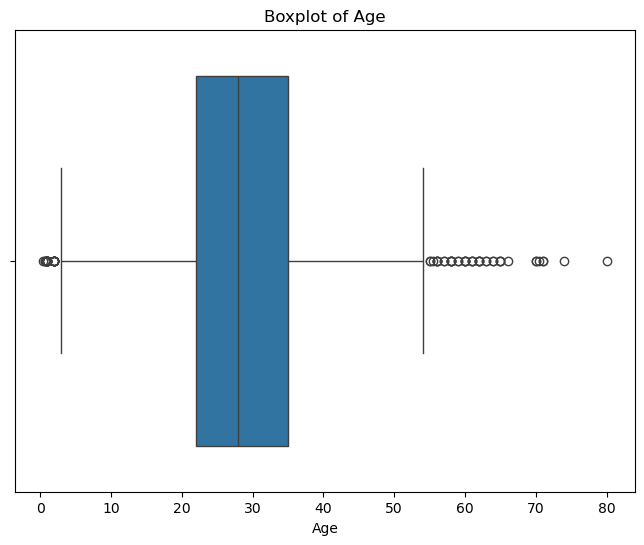

In [17]:
# Identify outliers using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.show()

C:\Users\123\AppData\Local\Temp\ipykernel_4508\3007706306.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='coolwarm')


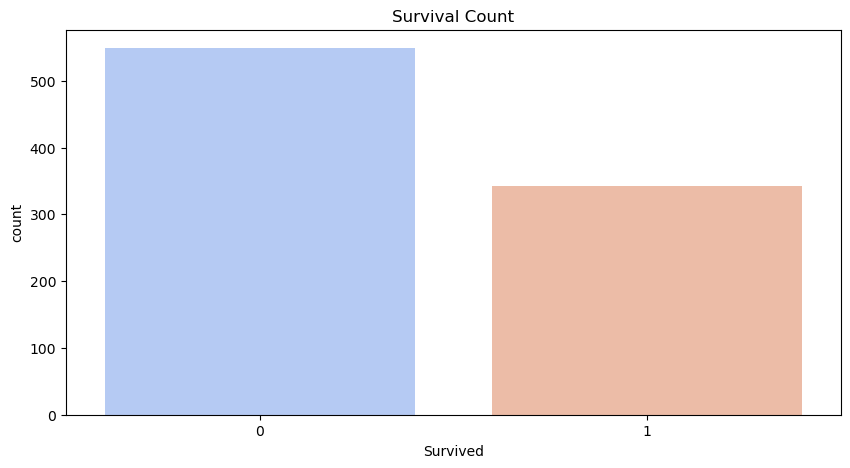

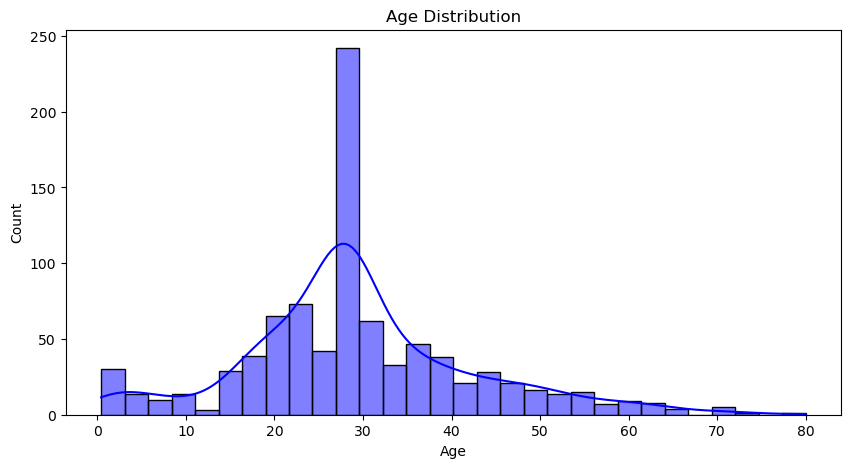

In [21]:
# Visualizations
plt.figure(figsize=(10, 5))
sns.countplot(x='Survived', data=df, palette='coolwarm')
plt.title("Survival Count")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution")
plt.show()

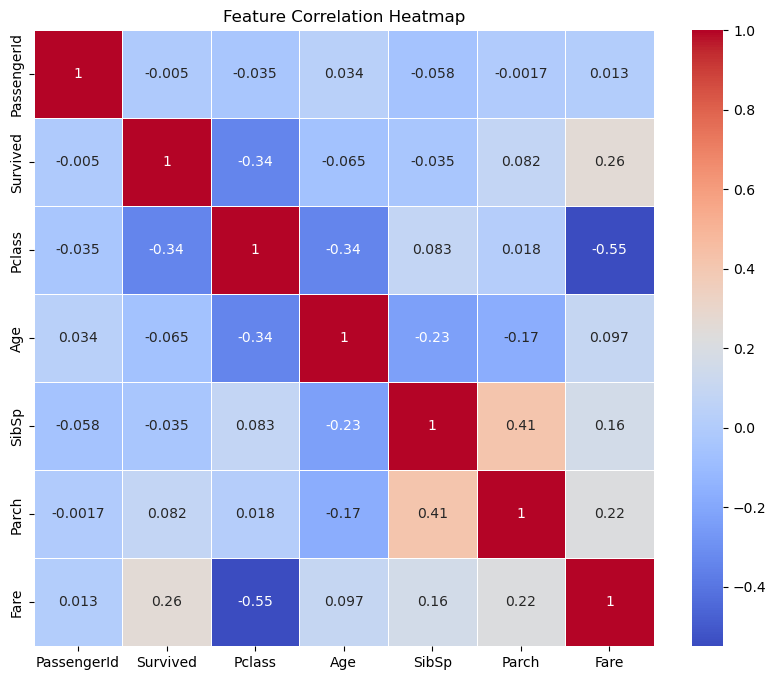

In [25]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [27]:
# Summary insights
insights = """
1. Most passengers were in the 20-40 age group.
2. The survival rate was higher for younger passengers.
3. Missing values in Age were replaced with the median.
4. The dataset had duplicates, which were removed.
5. The heatmap shows strong correlation between Fare and Pclass.
"""
print(insights)



1. Most passengers were in the 20-40 age group.
2. The survival rate was higher for younger passengers.
3. Missing values in Age were replaced with the median.
4. The dataset had duplicates, which were removed.
5. The heatmap shows strong correlation between Fare and Pclass.

